In [9]:
import os, platform

distr = platform.dist()[0]

PATH = os.path.expanduser('~/datasets/letsdance') if distr == 'Ubuntu' else '/run/media/nast/DATA/letsdance'
TRAIN_PATH = "letsdance_split/train"
VALID_PATH = "letsdance_split/validation"
TEST_PATH = "letsdance_split/test"

print("dataset path:", PATH)

dataset path: /home/anton/datasets/letsdance


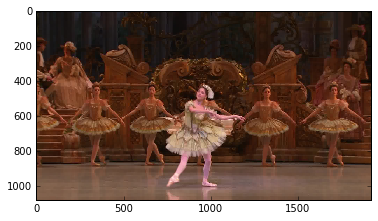

In [10]:
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

path = "letsdance_split/train/ballet/Et31LySAxf0_020_0266.jpg"
image = misc.imread(os.path.join(PATH, path))
plt.imshow(image)
plt.show()

In [11]:
import numpy as np
print(image.shape, np.amin(image), np.amax(image))

(1080, 1920, 3) 0 255


In [21]:
from collections import Counter


# A vector of filenames.


def get_file_names_in_dataset(dataset_path):
    classes = os.listdir(os.path.join(PATH, dataset_path))
    file_names_in_dataset = {}
    for cl in classes:
        file_names_in_dataset[cl] = sorted(os.listdir(os.path.join(PATH, dataset_path, cl)))
    return file_names_in_dataset


def video_name_from_file_name(file_name):
    return '_'.join(file_name.split('_')[:-1])


def get_num_of_frames_in_videos(list_of_file_names):
    videos_names = map(lambda x: video_name_from_file_name(x), list_of_file_names)
    return Counter(videos_names)
 
    
def select_videos_with_N_frames(list_of_file_names, N):
    nfr = get_num_of_frames_in_videos(list_of_file_names)
    video_names, _ = zip(*filter(lambda x: x[1] == N, nfr.items()))
    return video_names


def select_video_names_for_dances(file_names_in_dataset, N):
    """Selects videos with N frames for each dance so all dances
    have equal number of videos. Number of videos for a dance is
    the smallest number of videos having N frames among all dances."""
    selected = {}
    for dance_name, list_of_file_names in file_names_in_dataset.items():
        videos_with_N_frames = select_videos_with_N_frames(list_of_file_names, N)
        selected[dance_name] = videos_with_N_frames
    min_num_of_videos_with_N_frames = min(map(len, selected.values()))
    for k, v in selected.items():
        selected[k] = sorted(v)[:min_num_of_videos_with_N_frames]
    return selected


def select_file_names_for_work(file_names_in_dataset, N):
    video_names = select_video_names_for_dances(file_names_in_dataset, N)
    selected_file_names = {}
    for dance, list_of_file_names in file_names_in_dataset.items():
        selected_file_names[dance] = [fn for fn in list_of_file_names
                                      if video_name_from_file_name(fn) in video_names[dance]]
    return selected_file_names


def prepend_path(file_names_in_dataset, path):
    for dance, loffn in file_names_in_dataset.items():
        file_names_in_dataset[dance] = list(map(lambda x: os.path.join(path, dance, x), sorted(loffn)))
    return file_names_in_dataset
        
    
file_names_in_dataset = get_file_names_in_dataset(TRAIN_PATH)

print("beforer filtering")
for dance, loffn in file_names_in_dataset.items():
    print(dance,
          'total number of frames: {}'.format(len(loffn)),
          'number of videos: {}'.format(len(get_num_of_frames_in_videos(loffn))),
          end='\n\n', sep='\n')
print('*********\n\nAfter filtering')
file_names_for_train = select_file_names_for_work(file_names_in_dataset, 300)
dance, loffn = list(file_names_for_train.items())[0]
print('total number of frames: {}'.format(len(loffn)),
      'number of videos: {}'.format(len(get_num_of_frames_in_videos(loffn))),
      end='\n\n', sep='\n')

file_names_for_train = prepend_path(file_names_for_train, os.path.join(PATH, TRAIN_PATH))

beforer filtering
square
total number of frames: 23880
number of videos: 80

foxtrot
total number of frames: 23700
number of videos: 79

quickstep
total number of frames: 24000
number of videos: 80

tango
total number of frames: 24000
number of videos: 80

latin
total number of frames: 23880
number of videos: 80

ballet
total number of frames: 23610
number of videos: 83

swing
total number of frames: 21840
number of videos: 73

flamenco
total number of frames: 23610
number of videos: 79

break
total number of frames: 23490
number of videos: 79

waltz
total number of frames: 23700
number of videos: 79

*********

After filtering
total number of frames: 21300
number of videos: 71



In [22]:
valid_file_names_in_dataset = get_file_names_in_dataset(VALID_PATH)
print("beforer filtering")
for dance, loffn in valid_file_names_in_dataset.items():
    print(dance,
          'total number of frames: {}'.format(len(loffn)),
          'number of videos: {}'.format(len(get_num_of_frames_in_videos(loffn))),
          end='\n\n', sep='\n')
print('*********\n\nAfter filtering')
valid_file_names_for_work = select_file_names_for_work(valid_file_names_in_dataset, 300)
dance, loffn = list(valid_file_names_for_work.items())[0]
print('total number of frames: {}'.format(len(loffn)),
      'number of videos: {}'.format(len(get_num_of_frames_in_videos(loffn))),
      end='\n\n', sep='\n')
valid_file_names_for_work = prepend_path(valid_file_names_for_work, os.path.join(PATH, VALID_PATH))

beforer filtering
square
total number of frames: 3000
number of videos: 10

foxtrot
total number of frames: 3000
number of videos: 10

quickstep
total number of frames: 3000
number of videos: 10

tango
total number of frames: 3000
number of videos: 10

latin
total number of frames: 3000
number of videos: 10

ballet
total number of frames: 2820
number of videos: 10

swing
total number of frames: 3000
number of videos: 10

flamenco
total number of frames: 3000
number of videos: 10

break
total number of frames: 2970
number of videos: 10

waltz
total number of frames: 3000
number of videos: 10

*********

After filtering
total number of frames: 2400
number of videos: 8



In [23]:
test_file_names_in_dataset = get_file_names_in_dataset(TEST_PATH)
print("beforer filtering")
for dance, loffn in test_file_names_in_dataset.items():
    print(dance,
          'total number of frames: {}'.format(len(loffn)),
          'number of videos: {}'.format(len(get_num_of_frames_in_videos(loffn))),
          end='\n\n', sep='\n')
print('*********\n\nAfter filtering')
test_file_names_for_work = select_file_names_for_work(test_file_names_in_dataset, 300)
dance, loffn = list(test_file_names_for_work.items())[0]
print('total number of frames: {}'.format(len(loffn)),
      'number of videos: {}'.format(len(get_num_of_frames_in_videos(loffn))),
      end='\n\n', sep='\n')
test_file_names_for_work = prepend_path(test_file_names_for_work, os.path.join(PATH, TEST_PATH))

beforer filtering
square
total number of frames: 3000
number of videos: 10

foxtrot
total number of frames: 3000
number of videos: 10

quickstep
total number of frames: 3000
number of videos: 10

tango
total number of frames: 3000
number of videos: 10

latin
total number of frames: 2910
number of videos: 10

ballet
total number of frames: 3000
number of videos: 10

swing
total number of frames: 3000
number of videos: 10

flamenco
total number of frames: 2850
number of videos: 10

break
total number of frames: 3000
number of videos: 10

waltz
total number of frames: 3000
number of videos: 10

*********

After filtering
total number of frames: 2400
number of videos: 8



In [29]:
import tensorflow as tf

BATCH_SIZE = 30
NUM_DANCES = len(file_names_for_train)
print(NUM_DANCES)
NUM_FRAMES_PER_DANCE_TRAIN = len(list(file_names_for_train.values())[0])

def _parse_function(filename, label):
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string)
    # image_resized = tf.image.resize_images(image_decoded, [28, 28])
    return image_decoded, label

def build_dataset(file_names_for_dataset):
    datasets_by_dance = {}

    for idx, (dance, loffn) in enumerate(sorted(file_names_for_dataset.items())):
        labels = tf.constant([idx] * len(loffn))
        filenames = tf.constant(loffn)
        datasets_by_dance[dance] = tf.data.Dataset.from_tensor_slices(
            (filenames, labels)
        ).shuffle(len(loffn)).map(_parse_function)
    # print()
    dance_zip = tf.data.Dataset.zip(tuple(datasets_by_dance.values()))
    # print(dance_zip)
    return dance_zip.batch(BATCH_SIZE // NUM_DANCES)

train_dataset = build_dataset(file_names_for_train)
valid_dataset = build_dataset(valid_file_names_for_work)
test_dataset = build_dataset(test_file_names_for_work)

10


In [33]:
iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                           train_dataset.output_shapes)

next_element = iterator.get_next()

inputs, labels = zip(*next_element)

inputs = tf.concat(inputs, 0)
labels = tf.concat(labels, 0)

conv1 = tf.layers.Conv2D(
    96,
    11,
    (4, 4),
    activation=tf.nn.relu,
    name='conv1',
    kernel_initializer=tf.truncated_normal_initilizer(stddev=0.005),
)

conv2 = tf.layers.Conv2D(
    256,
    5,
    (1, 1)
    activation=tf.nn.relu,
    name='conv2',
    padding='same',
    kernel_initializer=tf.truncated_normal_initilizer(stddev=0.005),
)

conv3 = tf.layers.Conv2D(
    384,
    3,
    (1, 1),
    activation=tf.nn.relu,
    name='conv3', 
    padding='same',
    kernel_initializer=tf.truncated_normal_initilizer(stddev=0.005),
)

conv4 = tf.layers.Conv2D(
    384,
    3,
    (1, 1),
    activation=tf.nn.relu,
    name='conv4',  
    padding='same',
    kernel_initializer=tf.truncated_normal_initilizer(stddev=0.005),
)

conv5 = tf.layers.Conv2D(
    256,
    3,
    (1, 1),
    activation=tf.nn.relu,
    name='conv5',    
    padding='same',
    kernel_initializer=tf.truncated_normal_initilizer(stddev=0.005),
)

dropout_rate = tf.placeholder(tf.float32)

h = conv1(inputs)
h = tf.layers.max_pooling2d(h, 3, 2)
h = tf.nn.layer_response_normalization(h)

h = conv2(h)
h = tf.layers.max_pooling2d(h, 3, 2)
h = tf.nn.layer_response_normalization(h)

h = conv3(h)

h = conv4(h)

h = conv5(h)
h = tf.layers.max_pooling2d(h, 3, 2)

h = tf.nn.dropout(h, 1. - dropout_rate)

h = tf.reshape(h, tf.stack([tf.shape(h)[0], -1]))

h = tf.contrib.layers.fully_connected(h, 4096)

h = tf.nn.dropout(h, 1. - dropout_rate)

h = tf.contrib.layers.fully_connected(h, 4096)

h = tf.contrib.layers.fully_connected(h, 1000, activation_fn=tf.nn.softmax)

print(inputs.shape)
print(labels.shape)

training_init_op = iterator.make_initializer(train_dataset)
validation_init_op = iterator.make_initializer(valid_dataset)
test_init_op = iterator.make_initializer(test_dataset)

(?, ?, ?, ?)
(?,)


0


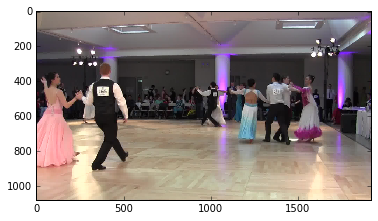

1


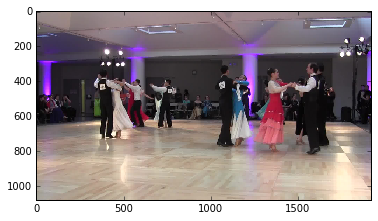

2


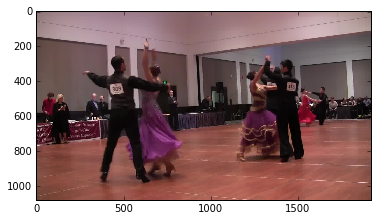

3


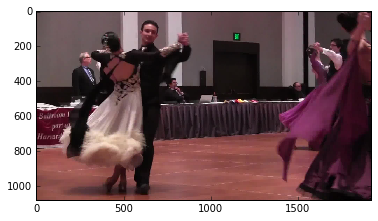

4


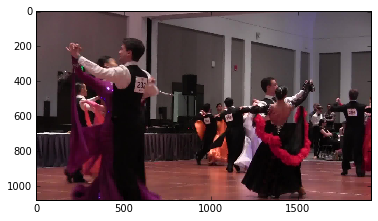

KeyboardInterrupt: 

In [25]:
iterator = dance_zip.make_initializable_iterator()
next_element = iterator.get_next()

with tf.Session() as sess:
    for _ in range(10):
        sess.run(iterator.initializer)
        i = 0
        while True:
            try:
                res = sess.run(next_element)
                if i < 5:
                    print(i)
                    array = res[0][0]
                    plt.imshow(array)
                    plt.show()
                i += 1
            except tf.errors.OutOfRangeError:
                break
        print('*' * 10)
